## Procedure

1. Clean and transform data
2. **Exploratory Data Analysis (EDA)**
3. Handle imbalanced classes
4. Modeling & evaluation

## Exploratory Data Analysis
As a data scientist, you have to make a lot of decisions that ultimately affect the performance of your models. To do your best in making responsible, informed decisions, you have to learn about your data's characteristics and distributions.

In [1]:
import pandas as pd
import numpy as np
from sklearn.externals import joblib
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
non_transformed_features = joblib.load('../work/data/non_transformed_features')
transformed_features = joblib.load('../work/data/transformed_features')
logged_features = joblib.load('../work/data/logged_features')
target = joblib.load('../work/data/target')

In [3]:
non_transformed_data = pd.concat([non_transformed_features,target], axis=1)
non_transformed_data.head(2)

,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,Dayofweek,failure
0,215630672,56,0,52,6,407438,0,0,7,3,0
1,61370680,0,3,0,6,403174,0,0,0,3,0


In [4]:
non_transformed_features.drop('device', axis=1, inplace=True)
joblib.dump(non_transformed_features, '../work/data/non_transformed_features')

ValueError: labels ['device'] not contained in axis

In [ ]:
logged_features.drop(['Dayofweek_0', 'Dayofweek_1', 'Dayofweek_2', 'Dayofweek_3',
       'Dayofweek_4', 'Dayofweek_5', 'Dayofweek_6'], axis=1, inplace=True)

In [ ]:
columns = ['attribute1', 'attribute2', 'attribute3', 'attribute4', 'attribute5', 'attribute6', 'attribute7',
       'attribute8', 'attribute9']

logged_features = logged_features[columns]

In [5]:
logged_data = pd.concat([logged_features,target], axis=1)
logged_data.head(2)

,Dayofweek_0,Dayofweek_1,Dayofweek_2,Dayofweek_3,Dayofweek_4,Dayofweek_5,Dayofweek_6,attribute2,attribute3,attribute4,attribute5,attribute7,attribute8,attribute9,attribute1,attribute6,failure
0,0,0,0,1,0,0,0,4.043051,0.000000,3.970292,1.94591,0.0,0.0,2.079442,215630672,407438,0
1,0,0,0,1,0,0,0,0.000000,1.386294,0.000000,1.94591,0.0,0.0,0.000000,61370680,403174,0


### Use Random Forest to find important features
Random Forest randomly generates a bunch of decision trees and takes turns leaving out each varibale in fitting the model. This way, you can calsulcate how much better or worse a model does when you leave one variable out. 

In [11]:
features

array(['attribute1', 'attribute2', 'attribute3', 'attribute4',
       'attribute5', 'attribute6', 'attribute7', 'attribute8',
       'attribute9', 'Dayofweek'], dtype=object)

In [10]:
features = non_transformed_features.columns.values

rfc = RandomForestClassifier()
rfc.fit(non_transformed_features, target)

print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), features), reverse=True))

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Features sorted by their score:
[(0.3256, 'attribute1'), (0.2235, 'attribute6'), (0.090999999999999998, 'attribute5'), (0.082799999999999999, 'Dayofweek'), (0.0717, 'attribute2'), (0.070699999999999999, 'attribute4'), (0.0458, 'attribute8'), (0.039600000000000003, 'attribute7'), (0.031, 'attribute9'), (0.0184, 'attribute3')]


* attribute1
* attribute6
* attribute2
* attribute4
* attribute5
* Dayofweek
* attribute8

## PCA
Use the first two principal components to visualize the data

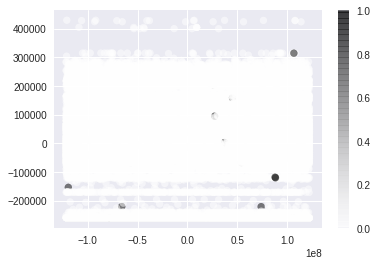

In [33]:
# Try PCA on non-transformed data 

pca = PCA()
features_pca = pca.fit_transform(non_transformed_features)
plt.scatter(features_pca[:,0], features_pca[:,1], c=target, alpha=.5)
plt.colorbar()

In [12]:
transformed_features

array([[-0.40960167, -0.40488324, -0.39951908, ...,  1.67354203,
         1.32335828,  1.4852681 ],
       [-0.40960167, -0.40488324, -0.39951908, ..., -0.39352321,
        -0.86599837,  1.44226284],
       [-0.40960167, -0.40488324, -0.39951908, ..., -0.39352321,
         0.72251703, -0.22973779],
       ..., 
       [ 2.44139632, -0.40488324, -0.39951908, ..., -0.39352321,
        -1.46693691,  0.91010311],
       [ 2.44139632, -0.40488324, -0.39951908, ..., -0.39352321,
         1.4840578 ,  0.99653721],
       [ 2.44139632, -0.40488324, -0.39951908, ..., -0.39352321,
        -1.48760537,  0.92040057]])

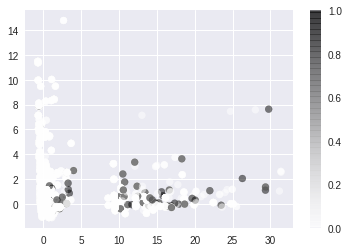

In [35]:
# Try PCA on transformed data

pca = PCA()
pca_features = pca.fit_transform(transformed_features)
plt.scatter(pca_features[:,0], pca_features[:,1], c=target, alpha=.5)
plt.colorbar()

In [36]:
pca.explained_variance_ratio_[:5]

array([ 0.13258631,  0.10384451,  0.07315312,  0.07306768,  0.07299079])

In [37]:
# 11 components can account for 90% of the variance

np.where(np.cumsum(pca.explained_variance_ratio_) > .9)[0][0]

11

In [38]:
len(pca.explained_variance_ratio_)

16

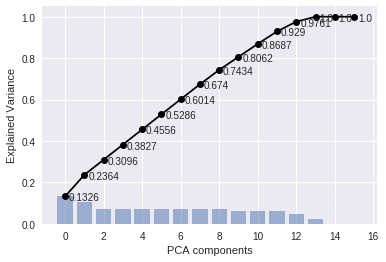

In [39]:
# create an x-axis variable for each pca component
x = np.arange(16)

# plot the cumulative variance
plt.plot(x, np.cumsum(pca.explained_variance_ratio_), '-o', color='black')

# plot the components' variance
plt.bar(x, pca.explained_variance_ratio_, align='center', alpha=0.5)

# plot styling
for i,j in zip(x, np.cumsum(pca.explained_variance_ratio_)):
    plt.annotate(str(j.round(4)),xy=(i+.2,j-.02))
plt.xlabel('PCA components')
plt.ylabel('Explained Variance')
plt.show()

In [50]:
non_transformed_features.columns

Index(['attribute1', 'attribute2', 'attribute3', 'attribute4', 'attribute5',
       'attribute6', 'attribute7', 'attribute8', 'attribute9', 'Dayofweek'],
      dtype='object')